In [1]:
#import all the relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data sets.
odi_cricket=pd.read_csv("./originalDataset.csv")

In [3]:
#looking the dataset head.
odi_cricket.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
#checking the datatype..
odi_cricket.dtypes

Scorecard     object
Team 1        object
Team 2        object
Winner        object
Margin        object
Ground        object
Match Date    object
dtype: object

In [5]:
#lets view the null values..
odi_cricket.isnull().sum()


Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [6]:
# deleting the rows which have no results as analysis of it is unnecessary
odi_cricket=odi_cricket[odi_cricket.Margin.str.contains("result")==False]                
odi_cricket.Winner.value_counts()

Australia       555
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Ireland          51
Kenya            42
Afghanistan      42
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
ICC World XI      1
Africa XI         1
Name: Winner, dtype: int64

In [7]:
#Now we are looking  how many matches have each team played....
group1=odi_cricket.groupby("Team 1").size().rename("Team 1")
group2=odi_cricket.groupby("Team 2").size().rename("Team 2")
total=pd.concat([group1,group2],axis=1).fillna(0)
total["total"]=total["Team 1"]+total["Team 2"]
total.columns

C:\Users\tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Index(['Team 1', 'Team 2', 'total'], dtype='object')

Text(0.5, 1.0, 'ODI Matches Played by team')

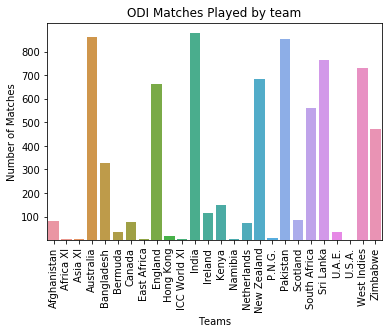

In [8]:
%matplotlib inline
sns.barplot(x=total.index,y=total["total"])
plt.ylabel("Number of Matches")
plt.xlabel("Teams")
plt.yticks([100,200,300,400,500,600,700,800])
plt.xticks(rotation=90)
plt.title("ODI Matches Played by team")

In [11]:
# Now we are calculating some W/L ratios per team....
odi_cricket["Loser"]=np.where(odi_cricket.Winner==odi_cricket["Team 2"],odi_cricket["Team 1"],odi_cricket["Team 2"])
winners=odi_cricket.groupby("Winner").size().rename("Won")
losers=odi_cricket.groupby("Loser").size().rename("Lost")
comb2=pd.concat([winners,losers],axis=1).fillna(0)
comb2["Win/Loss Ratio"]=comb2["Won"]/comb2["Lost"]
comb2.sort_values("Win/Loss Ratio",ascending=False)
comb2

C:\Users\tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Won,Lost,Win/Loss Ratio
Afghanistan,42.0,39,1.076923
Africa XI,1.0,4,0.250000
Asia XI,4.0,2,2.000000
Australia,555.0,307,1.807818
Bangladesh,105.0,223,0.470852
Bermuda,7.0,28,0.250000
Canada,17.0,58,0.293103
East Africa,0.0,3,0.000000
England,343.0,321,1.068536
Hong Kong,6.0,11,0.545455


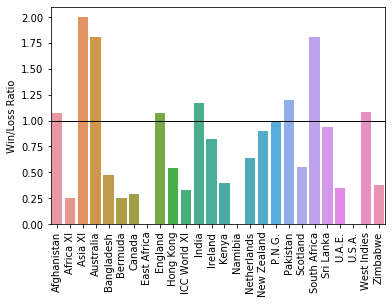

In [21]:
# Creating Win/loss Chart.....
%matplotlib inline
sns.barplot(x=comb2.index,y=comb2["Win/Loss Ratio"])
plt.xticks(rotation="vertical")
plt.axhline(1,color="black",linewidth=1)

In [14]:
#Now  we are Analyse matches for India by others teams..
ind_matches=odi_cricket[(odi_cricket["Team 1"]=="India") | (odi_cricket["Team 2"]=="India")]
Win=ind_matches.groupby("Winner").size().rename("Losses")
Lost=ind_matches.groupby("Loser").size().rename("Wins")
#Concat the two
comb3=pd.concat([Lost,Win],axis=1).fillna(0)
comb3=comb3.nlargest(10,"Wins")
comb3["Win/loss"]=comb3["Wins"]/comb3["Losses"]
comb3=comb3.drop(["India"])
comb3

C:\Users\tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Wins,Losses,Win/loss
Sri Lanka,88,54.0,1.629630
West Indies,56,61.0,0.918033
England,52,39.0,1.333333
New Zealand,51,44.0,1.159091
Pakistan,51,72.0,0.708333
Zimbabwe,51,10.0,5.100000
Australia,45,73.0,0.616438
South Africa,29,45.0,0.644444
Bangladesh,27,5.0,5.400000


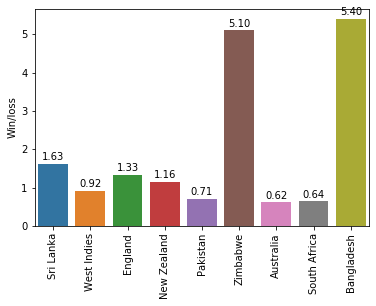

In [15]:
%matplotlib inline
ax=sns.barplot(x=comb3.index,y=comb3["Win/loss"])

plt.xticks(rotation="vertical")
#Adding annotation
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2),y=height+0.1,
 s = "{:.2f}".format(height),
 ha = "center") 

    

In [16]:
# Now we are looking how many teams have won batting first & vice versa....
odi_cricket.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Loser
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",Pakistan


In [17]:
bat_first=odi_cricket.Margin.str.contains("wickets")
bat_first.value_counts()

False    1908
True     1845
Name: Margin, dtype: int64

# A higher False value indicates that teams that have batted first have won on more occasions than teams that have fielded first.

In [18]:
#Now we are looking time series analysis..
odi_cricket["Year"]=odi_cricket["Match Date"].str.strip().str[-4:]
odi_cricket

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Loser,Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England,1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia,1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England,1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia,1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",Pakistan,1973
...,...,...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017",India,2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017",Bangladesh,2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017",Sri Lanka,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017",New Zealand,2017


Text(0, 0.5, 'Number of Matches')

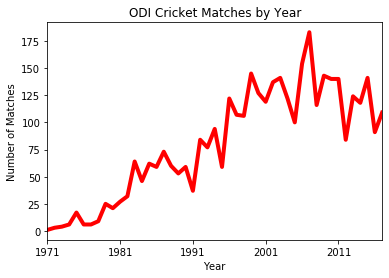

In [20]:
yeared=odi_cricket.groupby("Year").size()
yeared.plot(kind="line",color="red",linewidth=4)
plt.title("ODI Cricket Matches by Year")
plt.ylabel("Number of Matches")